# Basic Example

In [1]:
import torch
import confounding_robust_inference as cri

_ = torch.random.manual_seed(0)

In [21]:
# setup toy policy and data
TORCH_DTYPE = cri.utils.types.get_default_torch_dtype()
beta = torch.as_tensor([1, 0.5, -0.5, 0, 0], dtype=TORCH_DTYPE)
policy = cri.policies.LogisticPolicy(beta)
data = cri.data.SyntheticDataBinary()
Y, T, X, _, p_t, _ = data.sample(1000)

In [28]:
def average_ipw(k):
    samples = []
    for i in range(k):
        Y, T, X, _, p_t, _ = data.sample(100000)
        samples.append(
            cri.estimators.IPWEstimator().fit(Y, T, X, p_t, policy).predict()
        )
    return torch.mean(torch.as_tensor(samples))

In [29]:
average_ipw(10)

tensor(4.3868, dtype=torch.float64)

In [30]:
Y.mean()

tensor(5.0804, dtype=torch.float64)

In [6]:
data.evaluate_policy(policy, n_mc=100000)

tensor(4.3805, dtype=torch.float64)

In [26]:
data.evaluate_policy_lower_bound(policy, Gamma=1.5, n_mc=100000)

tensor(4.0770, dtype=torch.float64)

In [8]:
estimator = cri.estimators.KCMCEstimator(const_type="Tan_box", Gamma=1.5, D=30)

In [34]:
estimator.fit(Y, T, X, p_t, policy)

In [35]:
estimator.predict()

tensor(4.0993, dtype=torch.float64)

In [37]:
def GIC(D):
    est = cri.estimators.KCMCEstimator("Tan_box", Gamma=1.5, D=D)
    est.fit(Y, T, X, p_t, policy)
    return est.predict_gic()

In [38]:
GIC(5)

/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py:109: UserWarning: Current implementation of the asymptotics are known to be unstable, because of the difficulty of estimating the covariance and Hessian matrices involved. Please use the features with caution.
  warnings.warn(


tensor(3.9700, dtype=torch.float64)

In [39]:
GIC(10)

/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py:109: UserWarning: Current implementation of the asymptotics are known to be unstable, because of the difficulty of estimating the covariance and Hessian matrices involved. Please use the features with caution.
  warnings.warn(


tensor(3.9103, dtype=torch.float64)

In [40]:
GIC(20)

/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py:109: UserWarning: Current implementation of the asymptotics are known to be unstable, because of the difficulty of estimating the covariance and Hessian matrices involved. Please use the features with caution.
  warnings.warn(


tensor(3.9031, dtype=torch.float64)

/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py:109: UserWarning: Current implementation of the asymptotics are known to be unstable, because of the difficulty of estimating the covariance and Hessian matrices involved. Please use the features with caution.
  warnings.warn(
/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py:109: UserWarning: Current implementation of the asymptotics are known to be unstable, because of the difficulty of estimating the covariance and Hessian matrices involved. Please use the features with caution.
  warnings.warn(
/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py:109: UserWarning: Current implementation of the asymptotics are known to be unstable, because of the difficulty of estimating the covariance and Hessian matrices involved. Please use the features with caution.
  warnings.warn(
/home/kei/Desktop/master-thesis/confounding_robust_inference/estimators/kcmc.py

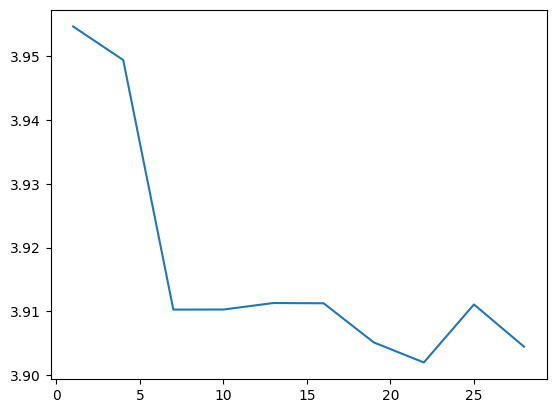

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1, 31, 3), [GIC(d) for d in range(1, 31, 3)])

In [74]:
data.evaluate_policy(policy)

tensor(5.0511, dtype=torch.float64)

In [22]:
help(cri.estimators.KCMCEstimator)

Help on class KCMCEstimator in module confounding_robust_inference.estimators.kcmc:

class KCMCEstimator(confounding_robust_inference.estimators.base.BaseKCMCEstimator)
 |  KCMCEstimator(const_type: 'str', gamma: 'float | None' = None, Gamma: 'float | None' = None, D: 'int' = 30, kernel: 'Kernel | None' = None) -> 'None'
 |  
 |  Kernel Conditional Moment Constraints (KCMC) Estimator.
 |  
 |  Args:
 |      const_type: Type of the constraint used. It must be one of "Tan_box", "lr_box", "KL",
 |          "inverse_KL", "squared_Hellinger", "Pearson_chi_squared",
 |          "Neyman_chi_squared", and "total_variation".
 |      gamma: Sensitivity parameter for f-divergence constraint satisfying gamma >= 0.0.
 |          When gamma == 0.0, QB estimator is equivalent to the IPW estimator.
 |      Gamma: Sensitivity parameter for box constraints satisfying Gamma >= 1.0.
 |          When Gamma == 1.0, QB estimator is equivalent to the IPW estimator.
 |      D: Dimension of the low-rank approxi